In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

from collections import defaultdict

In [2]:
df=pd.read_csv("../datatraining.csv", sep=";")
test=pd.read_csv("../datatest.csv", sep=";")

In [3]:
class_name='Occupancy'
attributes = [col for col in df.columns if 
              col == 'Temperature'
              or col == 'Humidity'
              or col == 'Light'
              or col == 'CO2'
             ]
X_train = df[attributes]
y_train = df[class_name]

X_test=test[attributes]
y_test = df[class_name]

In [4]:
X_trainv=X_train.values
X_testv=X_test.values

In [5]:
dbscan = DBSCAN(eps=50, min_samples=4)
dbscan.fit(X_trainv)

DBSCAN(algorithm='auto', eps=50, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [6]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([  14, 8129]))

In [7]:
X_train.loc[np.where(dbscan.labels_==-1)]

,Temperature,Humidity,Light,CO2
1143,22.675000,26.525000,732.750000,1038.500000
1156,22.823333,25.856667,340.666667,983.000000
1181,22.290000,26.166667,334.333333,900.333333
1453,22.025000,24.047500,213.000000,845.500000
2605,21.290000,19.666667,131.333333,665.333333
2606,21.290000,19.745000,293.500000,662.250000
3830,20.700000,18.890000,611.500000,452.250000
3831,20.700000,18.890000,1546.333333,455.333333
3832,20.745000,18.890000,1451.750000,453.000000
3833,20.760000,18.856667,829.000000,452.666667


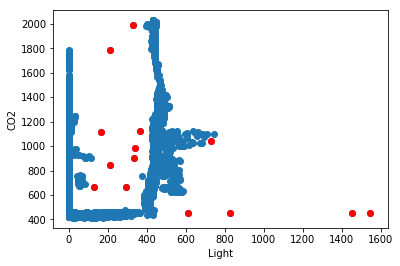

In [8]:
plt.scatter(X_train['Light'], X_train['CO2'])
plt.scatter(X_train['Light'].loc[np.where(dbscan.labels_==-1)], X_train['CO2'].loc[np.where(dbscan.labels_==-1)], color='red')
plt.xlabel('Light')
plt.ylabel('CO2') 
plt.show()

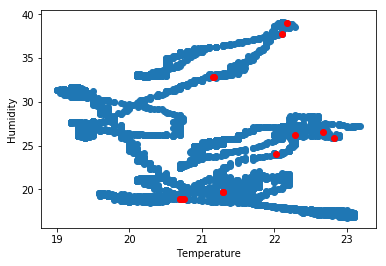

In [9]:
plt.scatter(X_train['Temperature'], X_train['Humidity'])
plt.scatter(X_train['Temperature'].loc[np.where(dbscan.labels_==-1)], X_train['Humidity'].loc[np.where(dbscan.labels_==-1)], color='red')
plt.xlabel('Temperature')
plt.ylabel('Humidity') 
plt.show()

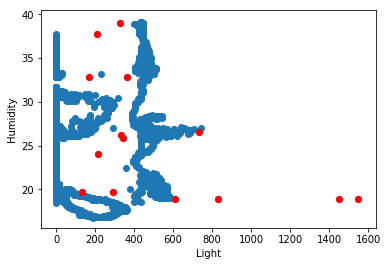

In [10]:
plt.scatter(X_train['Light'], X_train['Humidity'])
plt.scatter(X_train['Light'].loc[np.where(dbscan.labels_==-1)], X_train['Humidity'].loc[np.where(dbscan.labels_==-1)], color='red')
plt.xlabel('Light')
plt.ylabel('Humidity') 
plt.show()